In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('/Users/katari/Desktop/git/Medical_cost_dataset/src/data/insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


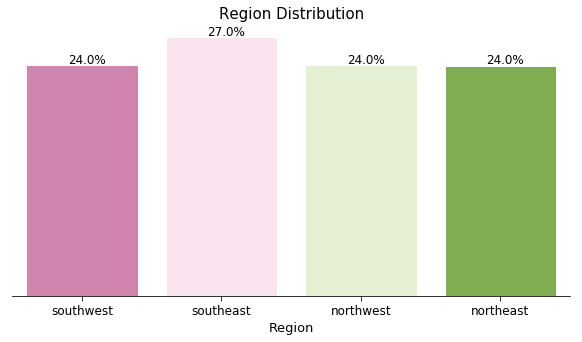

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x = 'region', data = df, palette = "PiYG", orient = 'h', ax = ax, edgecolor = '1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+3,str(round((i.get_height()/df.region.shape[0])*100))+'%',\
           fontsize = 12)
ax.set_xlabel("Region", fontsize = 13)
ax.set_title("Region Distribution", fontsize = 15)
ax.tick_params(length=5,labelsize=12,labelcolor = 'black')
x_axis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left= True)
plt.show()

In [10]:
print("minimum age:",df['age'].min())
print("maximum age:",df['age'].max())

minimum age: 18
maximum age: 64


In [11]:
# classify age into 3 groups
# Young adult(18-25), Adult(26-50), Senior(51-64)
# convert continious variable 'age' to categorical variable  

cut_points = [17,25,50,64]
labels = ['Young adult', 'Adult', 'Senior']
df['age_category'] = pd.cut(df["age"], cut_points, labels =  labels)
set(list(df['age_category']))

{'Adult', 'Senior', 'Young adult'}

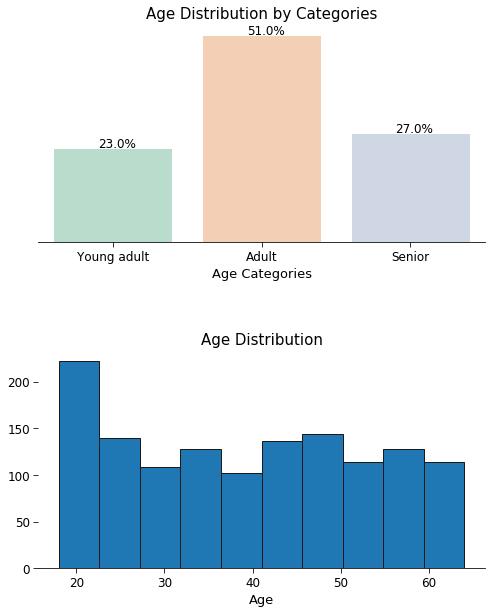

In [12]:
#Age distribution by categories

f, (ax,ax2) = plt.subplots(2,1,figsize = (8,10))
sns.countplot(x = 'age_category',data = df, palette = 'Pastel2',orient = 'v',ax = ax, edgecolor = '1')
for i in ax.patches:
    ax.text(i.get_x()+0.3,i.get_height()+3,\
           str(round((i.get_height()/df.age_category.shape[0])*100))+'%',fontsize =12)
ax.set_xlabel("Age Categories",fontsize =13)
ax.tick_params(length=5, labelsize = 12, labelcolor = 'black')
ax.set_title("Age Distribution by Categories",fontsize =15)

ax2.hist('age',bins = 10,data = df, edgecolor = '0.1')
ax2.set_xlabel("Age",fontsize =13)
ax2.tick_params(length=5, labelsize = 12, labelcolor = 'black')
ax2.set_title("Age Distribution",fontsize =15)
x_axis = ax.axes.get_yaxis().set_visible(False)
f.subplots_adjust(hspace = 0.5)
sns.despine(left=True)
plt.show()

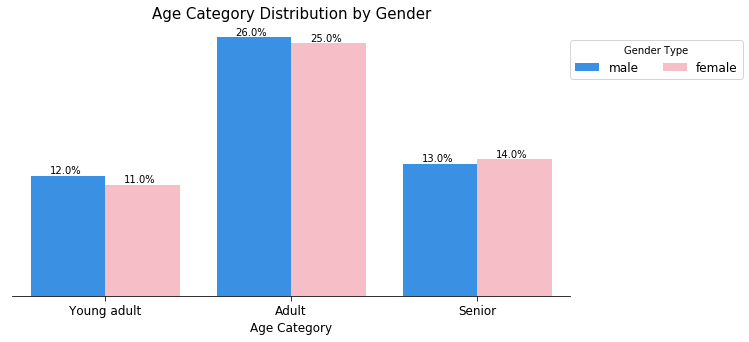

In [13]:
def gender_dist_plot(x_axis,title):
    f,ax = plt.subplots(figsize=(10,5))
    sns.countplot(x=x_axis, data = df, ax = ax,palette=['dodgerblue','lightpink']
                  ,hue='sex', hue_order=['male','female'] )

    for i in ax.patches:
        ax.text(i.get_x()+0.1, i.get_height()+3,\
                str(round((i.get_height()/df.region.shape[0])*100))+'%')
    ax.set_title(title+ ' Distribution by Gender', fontsize = 15)
    ax.set_xlabel(title, fontsize =12)
    ax.tick_params(length=5, labelsize= 12, labelcolor = 'black')
    x_axis = ax.axes.get_yaxis().set_visible(False)
    ax.legend(loc=[1,0.8],fontsize = 12, title = "Gender Type",ncol=2)
    sns.despine(left = True)
    plt.show()

gender_dist_plot("age_category",'Age Category')

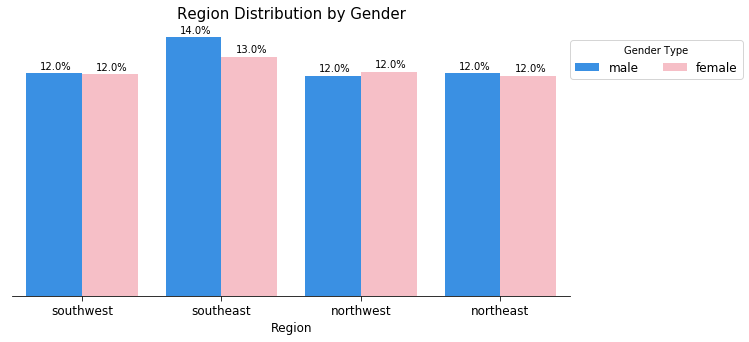

In [14]:
gender_dist_plot("region",'Region')

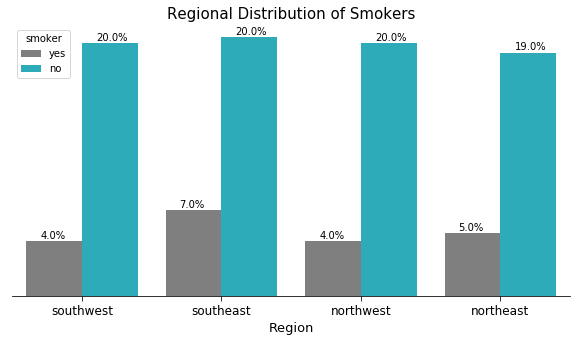

In [15]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='region', data = df, ax = ax , hue = "smoker", palette=["C7", "C9"])
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()+3,
               str(round((i.get_height()/df.region.shape[0])*100))+'%')
ax.set_xlabel("Region",fontsize=13)
ax.set_title("Regional Distribution of Smokers",fontsize =15)
ax.tick_params(length =5, labelsize=12)
xaxis = ax.axes.get_yaxis().set_visible(False)
sns.despine(left = True)
plt.show()

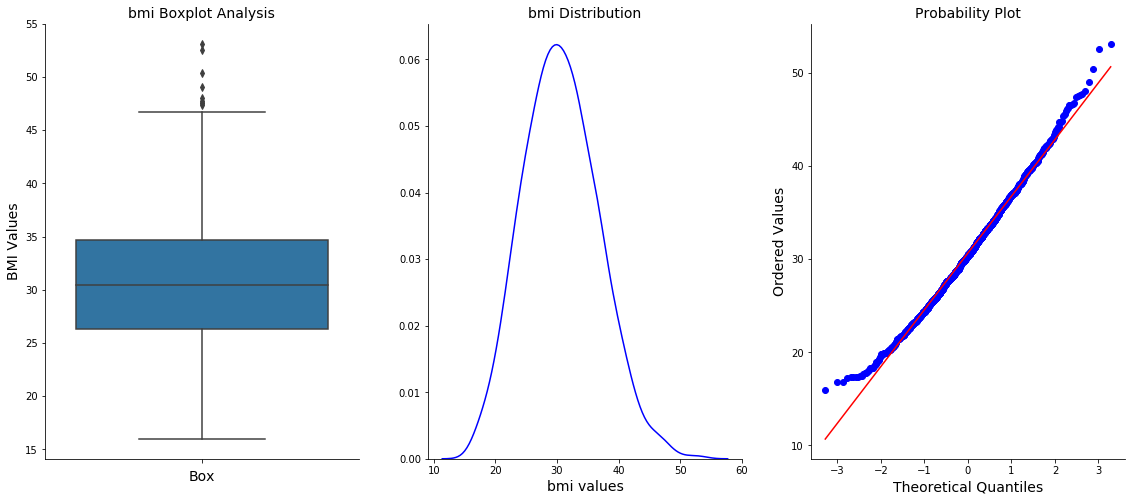

In [16]:
from scipy import stats
from scipy.stats import norm, skew, kurtosis

def data_transform(data,input):
    f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(8,8))
    
    sns.boxplot(x =input, data= data, ax = ax1, orient='v')
    sns.distplot(data[input],ax = ax2, color = 'blue', hist = False)
    res = stats.probplot(data[input], plot = ax3)
    
    axes = [ax1,ax2]
    kwargs = {'fontsize':14,'color':'black'}
    ax1.set_title(input+' Boxplot Analysis',**kwargs)
    ax1.set_xlabel('Box',**kwargs)
    ax1.set_ylabel('BMI Values',**kwargs)

    ax2.set_title(input+' Distribution',**kwargs)
    ax2.set_xlabel(input+' values',**kwargs)

    ax3.set_title('Probability Plot',**kwargs)
    ax3.set_xlabel('Theoretical Quantiles',**kwargs)
    ax3.set_ylabel('Ordered Values',**kwargs)
    f.subplots_adjust(wspace=0.22,right= 2)
    sns.despine()
    
    return plt.show()

    

data_transform(df,'bmi')

### Categorize BMI value

Underweight if bmi value is between 14 - 18.99
Normal if bmi value is btw 19 - 24.99
Overweight if bmi value is btw 25 - 29.99
Obese if bmi value is above 30

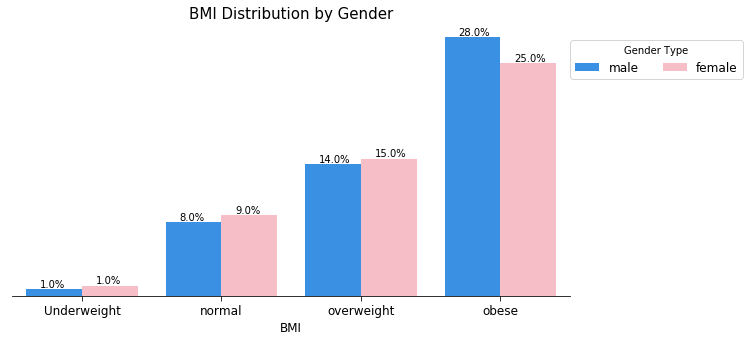

In [18]:
cut_points = [14,19,25,30,65]
label_names = ['Underweight',"normal","overweight","obese"]
df["bmi_cat"] = pd.cut(df['bmi'],cut_points,labels=label_names)
gender_dist_plot('bmi_cat','BMI')

### Charges feature analysis

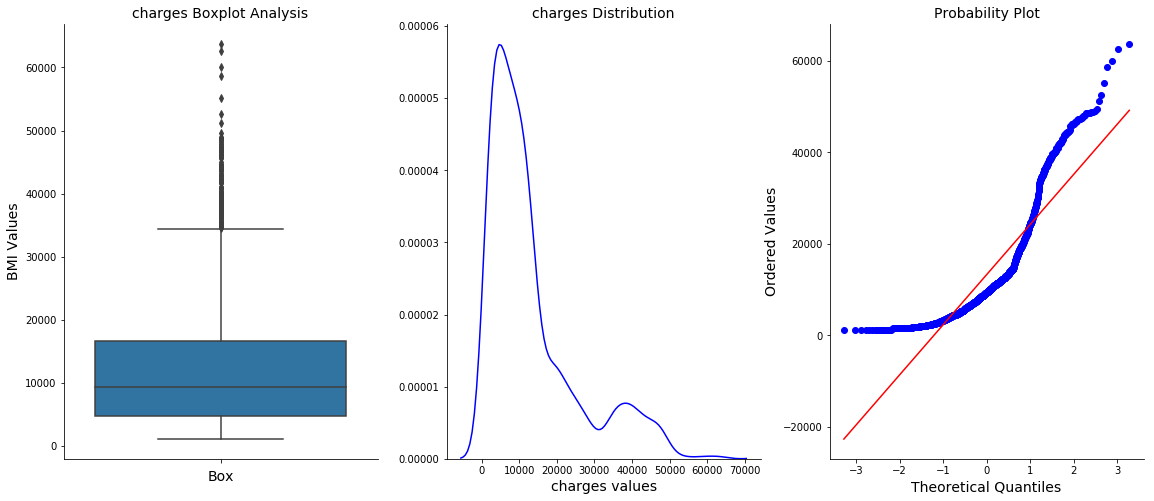

In [22]:
data_transform(df,'charges')

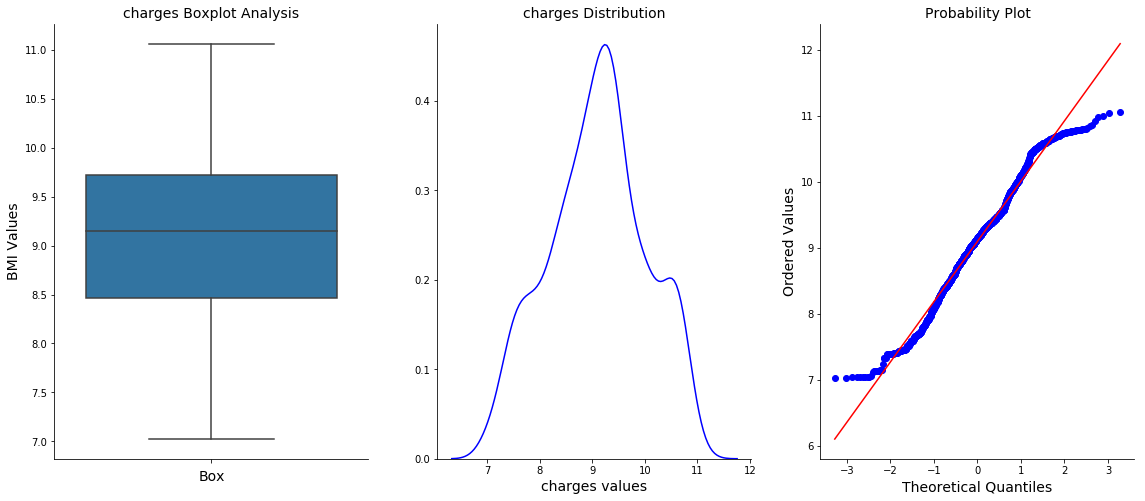

In [23]:
df.charges = np.log1p(df.charges)
data_transform(df,'charges')

### Scatter Plot Analysis

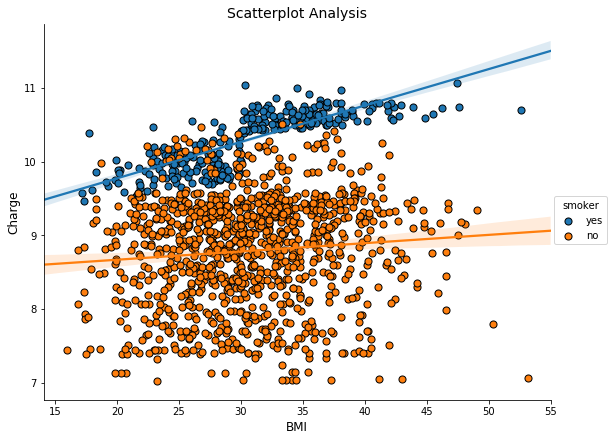

In [26]:
sns.lmplot(x = "bmi", y= "charges", hue = "smoker",data = df, 
           size = 6, aspect = 1.3,
          scatter_kws={"s": 50, "alpha": 1,'edgecolor':'black'}
          ,fit_reg=True)
plt.title('Scatterplot Analysis',fontsize=14)
plt.xlabel('BMI',fontsize=12)
plt.ylabel('Charge',fontsize=12)
plt.show()

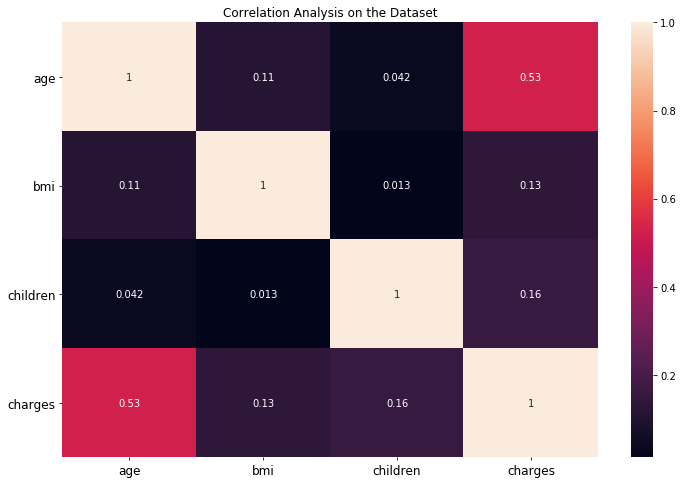

In [27]:
plt.figure(figsize=(12,8))
kwargs = {'fontsize':12,'color':'black'}
sns.heatmap(df.corr(),annot=True,robust=True)
plt.title('Correlation Analysis on the Dataset',**kwargs)
plt.tick_params(length=3,labelsize=12,color='black')
plt.yticks(rotation=0)
plt.show()

In [38]:
df.drop(['age_category','bmi_cat'],axis=1,inplace=True)
df_smoker = df[df.smoker=='yes']
df_smoker.head()
df_smoker.to_csv('/Users/katari/Desktop/git/Medical_cost_dataset/src/data/smoker_data.csv')